# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv, dotenv_values
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
path_to_env=r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 5\Starter_Code\.env"
load_dotenv(path_to_env)

True

In [5]:
print(load_dotenv())

True


In [6]:
#os.getenv("ALPACA_API_KEY")

In [7]:
#print(env_values)

In [8]:
env_values=dotenv_values(path_to_env)

In [9]:
print(path_to_env)

C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 5\Starter_Code\.env


In [86]:
#print(env_values['ALPACA_API_KEY'])

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [11]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [12]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [13]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

In [14]:
btc_response_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18900575,
   'total_supply': 18900575,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 47306.0,
     'volume_24h': 31404261497,
     'market_cap': 891458396468,
     'percentage_change_1h': 1.20783501374311,
     'percentage_change_24h': -3.46634510551597,
     'percentage_change_7d': -6.25337121735269,
     'percent_change_1h': 1.20783501374311,
     'percent_change_24h': -3.46634510551597,
     'percent_change_7d': -6.25337121735269},
    'CAD': {'price': 60556.4106,
     'volume_24h': 40200595142.3097,
     'market_cap': 1141155893318.69,
     'percent_change_1h': 1.20783501374311,
     'percent_change_24h': -3.46634510551597,
     'percent_change_7d': -6.25337121735269}},
   'last_updated': 1639470210}},
 'metadata': {'timestamp': 1639470210,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [15]:
# Current BTC price in Canadian Dollars
btc_cad=btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]

In [16]:
btc_cad

60556.4106

In [17]:
# Current BTC price in US Dollars
btc_usd=btc_response_data["data"]["1"]["quotes"]["USD"]["price"]

In [18]:
btc_usd

47306.0

In [19]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

In [20]:
eth_response_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 118732898,
   'total_supply': 118732898,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3814.96,
     'volume_24h': 25140617186,
     'market_cap': 450850684359,
     'percentage_change_1h': 1.84478659821159,
     'percentage_change_24h': -4.91491063136641,
     'percentage_change_7d': -12.2517270239791,
     'percent_change_1h': 1.84478659821159,
     'percent_change_24h': -4.91491063136641,
     'percent_change_7d': -12.2517270239791},
    'CAD': {'price': 4883.530296,
     'volume_24h': 32182504059.7986,
     'market_cap': 577133961047.956,
     'percent_change_1h': 1.84478659821159,
     'percent_change_24h': -4.91491063136641,
     'percent_change_7d': -12.2517270239791}},
   'last_updated': 1639470255}},
 'metadata': {'timestamp': 1639470255,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [21]:
# Current ETH price in Canadian Dollars
eth_cad=eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]

In [22]:
eth_cad

4883.530296

In [23]:
# Current ETH price in US Dollars
eth_usd=eth_response_data["data"]["1027"]["quotes"]["USD"]["price"]

In [24]:
eth_usd

3814.96

In [25]:
print(f"Current BTC closing price in CAD: ${btc_cad:0.2f}")
print(f"Current BTC closing price in USD: ${btc_usd}")
print(f"--------------------------------------------")
print(f"Current ETH closing price in CAD: ${eth_cad:0.2f}")
print(f"Current ETH closing price in USD: ${eth_usd}")

Current BTC closing price in CAD: $60556.41
Current BTC closing price in USD: $47306.0
--------------------------------------------
Current ETH closing price in CAD: $4883.53
Current ETH closing price in USD: $3814.96


In [26]:
# Compute current value of my crypto
my_btc_value=my_btc*btc_usd
my_eth_value=my_eth*eth_usd

In [27]:
# The USD value of Cypto assests
crypto = my_btc_value + my_eth_value

In [28]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your Crypto is ${crypto:0.2f}")

The current value of your 1.2 BTC is $56767.20
The current value of your 5.3 ETH is $20219.29
The current value of your Crypto is $76986.49


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [29]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [30]:
path_to_env=r"C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 5\Starter_Code\.env"

In [31]:
load_dotenv(path_to_env)

True

In [32]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [33]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [34]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-22", tz="America/New_York").isoformat()

In [35]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [36]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [37]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [38]:
# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                             open    high    low   close   volume    open   
time                                                                        
2020-10-22 00:00:00-04:00  117.51  117.54  117.3  117.31  3938694  342.96   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45094573

In [39]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])

In [40]:
agg_close_price

117.31

In [41]:
spy_close_price = float(df_portfolio["SPY"]["close"])

In [42]:
spy_close_price

344.63

In [45]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.31
Current SPY closing price: $344.63


In [46]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
shares = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your Shares is ${shares:0.2f}")

The current value of your 50 SPY shares is $17231.50
The current value of your 200 AGG shares is $23462.00
The current value of your Shares is $40693.50


### Savings Health Analysis

I am analysing the investment account whose values are expressed in the USD

In [47]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
investments_data = {"AMOUNT": [crypto, shares]}
investments = ["CRYPTO", "SHARES"]

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(investments_data, index=investments)
# Display savings DataFrame
display(df_savings)

,AMOUNT
CRYPTO,76986.488
SHARES,40693.500


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='AMOUNT'>

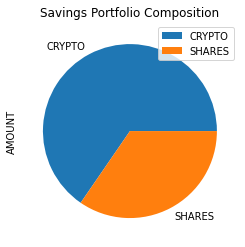

In [48]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="AMOUNT", title="Savings Portfolio Composition")

In [51]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

print(f"The emergency fund needed is ${emergency_fund:0.2f}")

# Calculate total amount of savings
current_total_savings=crypto+shares
print(f"The current total savings are ${current_total_savings:0.2f}")

# Compare the Total Savings amount to the amount of the required Emergency Fund
# Validate saving health
if current_total_savings > emergency_fund:
    print(f"Congratulations! Your emergency fund in good shape and you have a surplas of ${(current_total_savings-emergency_fund):0.2f}")
elif current_total_savings == emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund! Your have reached your financial goal and your emegency funds meets your minimum requirement of ${(emergency_fund):0.2f}")
else: 
    print(f"Keep up the good work! You are ${(emergency_fund-current_total_savings):0.2f} away from reaching your emergency fund goal of ${(emergency_fund):0.2f}")

The emergency fund needed is $36000.00
The current total savings are $117679.99
Congratulations! Your emergency fund in good shape and you have a surplas of $81679.99


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [53]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

# Set timeframe to '1
timeframe="1D"

In [54]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.95  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.43  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.26  366.2800  47917103

In [55]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# The weights of the portfolio are set at 40% for Bonds (AGG) and 60% for Stocks
MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [56]:
# Printing the simulation input data
MC.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [57]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999820,1.008056,1.000654,1.006443,0.995972,0.995993,1.002522,1.008661,0.992425,1.005371,...,0.991960,1.005713,0.998992,0.996914,1.003533,0.997148,1.001298,0.997457,0.992530,0.999586
2,1.002251,1.016415,1.005724,1.006064,0.999696,1.003822,0.998123,0.999359,0.989614,1.011140,...,0.998439,1.005275,1.011957,0.996911,1.012208,0.992994,1.003518,0.997487,0.988736,0.997772
3,1.006216,1.012419,1.014810,0.998159,0.996356,1.000235,1.007810,1.005172,0.988903,1.003178,...,0.994703,1.012354,1.019535,0.994831,1.010573,0.996616,1.004458,1.000119,0.987918,1.004129
4,0.999116,1.011024,1.014907,0.999660,0.995797,1.005965,1.014252,1.000512,0.993264,1.008229,...,1.000433,1.010098,1.018986,0.994361,1.008992,0.998664,0.995351,0.997471,0.981428,1.014210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,79.388303,61.395852,125.803188,250.872288,100.528029,147.590171,81.778052,83.772901,104.006928,217.617141,...,105.643334,129.648569,77.629278,157.474294,39.707793,218.611146,118.886864,126.008317,152.379867,82.794986
7557,79.028504,61.460737,124.809786,249.188143,100.678315,147.322455,81.411009,84.275050,103.301125,220.164348,...,105.098978,130.600150,77.754908,157.452012,39.751790,219.898558,119.328990,126.970147,150.824153,82.641674
7558,79.071050,61.779936,125.020953,248.171641,99.580768,146.620014,82.039716,85.070151,102.373443,220.534106,...,105.086581,130.532788,78.451551,158.035629,40.075180,220.458258,119.992119,127.612984,151.144893,82.673906
7559,78.982320,61.645949,124.558625,246.455101,99.769571,146.450077,82.376536,86.319256,102.716396,220.010172,...,105.401007,131.285665,78.847498,159.450998,40.277846,220.161189,120.572717,128.617879,151.968592,82.750657


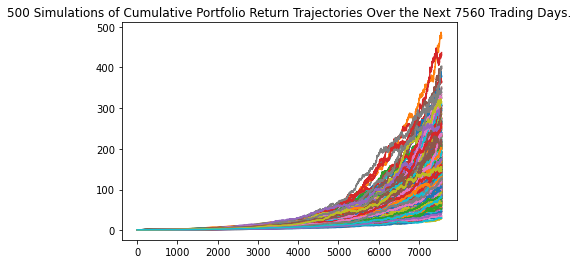

In [58]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

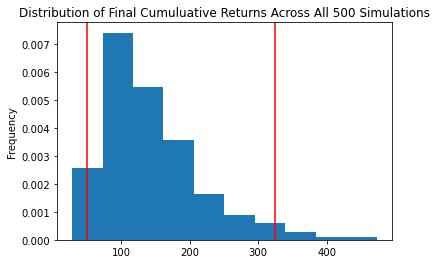

In [59]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean            143.214159
std              70.566843
min              28.742670
25%              95.135056
50%             125.668969
75%             175.362566
max             472.332356
95% CI Lower     50.438307
95% CI Upper    325.076377
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [64]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio")
print (f"over the next 30 years will end within in the range of")      
print (f"${even_ci_lower} and ${even_ci_upper}")  

There is a 95% chance that an initial investment of $20000 in the portfolio
over the next 30 years will end within in the range of
$1008766.14 and $6501527.53


In [67]:
#even_ci_lower

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [72]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower_new = round(even_tbl[8]*initial_investment_new,2)
even_ci_upper_new = round(even_tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio")
print(f"over the next 30 years will end within in the range of")      
print(f"${even_ci_lower_new} and ${even_ci_upper_new}") 

There is a 95% chance that an initial investment of $30000.0 in the portfolio
over the next 30 years will end within in the range of
$1513149.22 and $9752291.3


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [73]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [74]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007655,1.002254,1.003023,0.999821,1.001034,1.008418,1.005868,0.994649,1.007765,0.998564,...,1.000693,0.999227,0.997709,1.004354,1.003138,1.007789,1.005920,0.996358,1.003782,0.996165
2,1.008973,0.999120,1.001343,1.001576,1.003065,1.000630,1.005076,0.996589,1.005221,0.997317,...,0.993305,0.999289,0.985997,1.004509,1.007077,1.018262,1.018106,0.995988,1.003503,0.993201
3,1.015387,1.001965,0.997925,1.008760,1.005286,1.008993,1.014155,0.995547,1.008251,0.996302,...,0.992150,1.005466,0.995074,0.998823,1.007257,1.013326,1.017931,1.010203,0.999139,0.981233
4,1.009566,0.996443,0.997914,1.008496,1.000574,1.010495,1.014134,0.995672,1.014236,0.991028,...,1.007939,1.007139,1.003659,1.009019,0.992512,1.012596,1.017527,1.007368,0.993807,0.992054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.321430,2.998958,1.923539,1.839230,1.736035,2.361788,2.274545,2.170647,2.467558,2.070035,...,2.210000,1.998658,2.229431,1.851922,1.902630,2.243945,2.007639,1.850544,2.109413,2.607828
1257,2.313626,2.990029,1.935603,1.835744,1.737821,2.366137,2.274059,2.193233,2.458072,2.058214,...,2.199442,2.004198,2.225701,1.847863,1.894916,2.246585,2.002959,1.845101,2.109784,2.610808
1258,2.306986,2.985353,1.942789,1.827245,1.732004,2.377697,2.275991,2.208668,2.444437,2.067910,...,2.194643,2.022928,2.234859,1.844749,1.904523,2.251227,2.001302,1.836539,2.096679,2.608849
1259,2.306284,2.974757,1.970871,1.842045,1.729529,2.372449,2.277104,2.199859,2.426839,2.077518,...,2.179501,2.005507,2.232099,1.839037,1.897987,2.257253,1.996265,1.845006,2.104192,2.601343


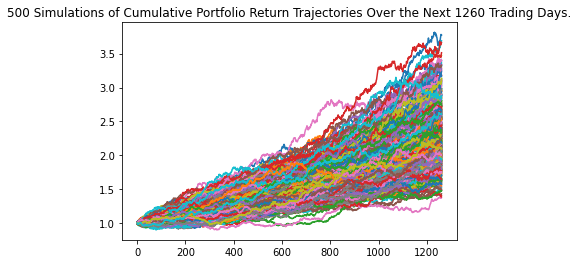

In [75]:
# Plot simulation outcomes
line_plot = MC_five.plot_simulation()

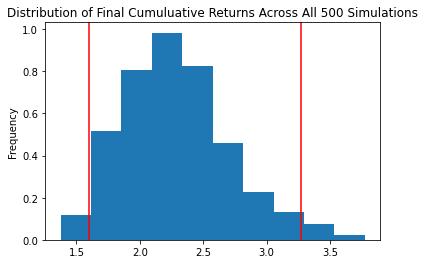

In [76]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five.plot_distribution()

In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five= MC_five.summarize_cumulative_return()


# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              2.287688
std               0.423513
min               1.374648
25%               1.994265
50%               2.241071
75%               2.539300
max               3.774292
95% CI Lower      1.595797
95% CI Upper      3.270921
Name: 1260, dtype: float64


In [78]:
# Set initial investment
initial_investment_high = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes if the initial investment is $100,000
even_ci_lower_five = round(even_tbl_five[8]*initial_investment_high,2)
even_ci_upper_five = round(even_tbl_five[9]*initial_investment_high,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_high} in the portfolio")
print (f"over the next 5 years will end within in the range of")      
print (f"${even_ci_lower_five} and ${even_ci_upper_five}")   

There is a 95% chance that an initial investment of $100000 in the portfolio
over the next 5 years will end within in the range of
$159579.68 and $327092.12


### Ten Years Retirement Option

In [79]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [80]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ikili\Downloads\monu-virt-fin-11-2021-u-c-master\Homework\Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002483,1.004215,0.991609,1.000946,1.000357,0.995781,1.004160,1.006286,0.994853,0.996296,...,0.999700,1.003001,0.999303,0.992687,0.998332,0.995936,1.001685,1.001130,0.998792,0.996399
2,0.998072,1.009386,0.983889,1.004623,1.002195,0.992333,1.003528,1.015807,0.997772,0.995982,...,1.005640,1.008093,1.001428,0.989535,1.009468,0.996351,0.994408,0.989435,0.998593,0.993157
3,0.996295,1.000723,0.978308,1.001078,1.003243,0.994032,1.006763,1.009834,0.998855,1.004501,...,1.011185,1.000158,0.997227,0.996643,1.003703,0.987580,1.008098,0.993742,0.994351,0.984087
4,1.001360,1.005098,0.978372,0.996339,0.999799,0.991791,0.995768,1.012022,1.007360,1.013430,...,1.008447,1.008132,0.999344,0.991123,0.999001,0.978445,1.004515,0.999571,0.999840,0.984477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.772053,5.997738,3.706248,2.212782,4.771608,4.335682,5.535452,6.386886,7.144086,4.499043,...,4.425490,4.611605,4.451116,4.537915,4.699909,3.688812,4.465094,4.096441,6.120857,5.941392
2517,7.795858,6.014654,3.727320,2.206826,4.746103,4.325667,5.516555,6.366990,7.153875,4.517255,...,4.419634,4.626710,4.460366,4.533437,4.671250,3.697402,4.412663,4.100131,6.151249,5.946990
2518,7.797854,6.029062,3.744768,2.222207,4.728367,4.325283,5.520753,6.388668,7.198015,4.466976,...,4.426687,4.644348,4.524113,4.532432,4.667968,3.691806,4.398858,4.138338,6.204831,6.011851
2519,7.830010,6.044645,3.717363,2.220815,4.681151,4.309760,5.552739,6.380601,7.198654,4.513576,...,4.461492,4.627660,4.538473,4.507107,4.670338,3.693369,4.415085,4.115521,6.223571,6.035544


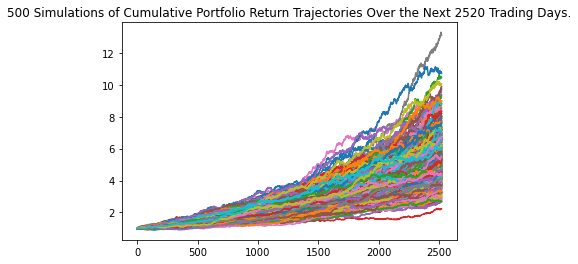

In [82]:
# Plot simulation outcomes
line_plot = MC_ten.plot_simulation()

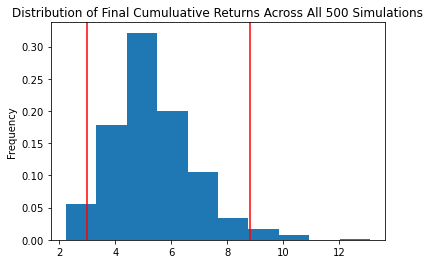

In [83]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten= MC_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              5.323520
std               1.458654
min               2.225287
25%               4.382227
50%               5.152355
75%               6.107989
max              13.112080
95% CI Lower      2.993980
95% CI Upper      8.820859
Name: 2520, dtype: float64


In [85]:
# Set initial investment
initial_investment_high = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000
even_ci_lower_ten = round(even_tbl_ten[8]*initial_investment_high,2)
even_ci_upper_ten = round(even_tbl_ten[9]*initial_investment_high,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_high} in the portfolio")
print (f"over the next 10 years will end within in the range of")      
print (f"${even_ci_lower_ten} and ${even_ci_upper_ten}") 

There is a 95% chance that an initial investment of $100000 in the portfolio
over the next 10 years will end within in the range of
$299398.01 and $882085.88
